In [16]:
%matplotlib inline
import matplotlib
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import sys
sys.path.append('../../rai/rai/ry')
import libry as lry
import math

Loading the environment:

In [2]:
K = lry.Config()
D = K.view()
K.clear();
K.addFile('human.g')

1st task: Robot reaching towards y_target:

In [3]:
def ReachTarget(K,Target_y,alpha,iterr,Part,Interpolate,Pause):
    
    n = K.getJointDimension()
    q = K.getJointState()
    w = 1e-4
    W = w * np.identity(n)  # W is equal the ID_n matrix times scalar w
    
    #input("initial posture, press Enter to continue...")
    
    Error = []
    F  = K.feature(lry.FS.position, [Part])  # "handR" is the name of the right hand ("handL" for the left hand)
    y0,j0 = F.eval(K)
    y_target = Target_y;
    
    for i in range(iterr):
        # 1st task
        y, J = F.eval(K)
        Error.append(np.linalg.norm(Target_y-y)) # Norm Distance

        # compute joint updates
        
        if(Interpolate):
            y_target = y0 + ((i+1)/iterr) * (Target_y - y0)
            
        q += alpha * inv(J.T @ J + W) @ J.T @ (y_target - y)
        # NOTATION: J.T is the transpose of J; @ is matrix multiplication (dot product)
        # sets joint angles AND computes all frames AND updates display
        K.setJointState(q)

        # optional: pause and watch 
        if(Pause):
            input("Press Enter to continue...")

    return Error

In [4]:
# Plot Error

def PlotError(iterr,Error,scatter):
    x = range(0,iterr)
    plt.plot(Error)
    if scatter : 
        plt.scatter(x,Error)
    plt.show()

In [5]:
# reset joint state to zeros

def Reset_JointState():
    q = np.zeros(K.getJointDimension())
    K.setJointState(q)
    print("Joint State Reset Done")

Press Enter to continue...
Press Enter to continue...
Press Enter to continue...
Press Enter to continue...
Press Enter to continue...
Press Enter to continue...


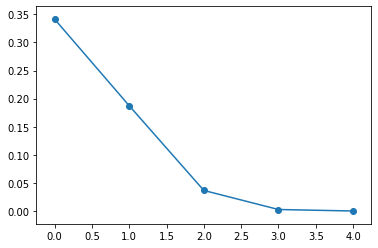

Press Enter to Reset...
Joint State Reset Done


In [6]:
#Q 3.a

y_target = [-0.2, -0.4, 1.1]
alpha = 1
iterr = 5
Part = "|handR"
input("Press Enter to continue...")
Err = ReachTarget(K,y_target,alpha,iterr,Part,False,True)
PlotError(iterr,Err,True)
input("Press Enter to Reset...")
Reset_JointState()

Press Enter to continue...


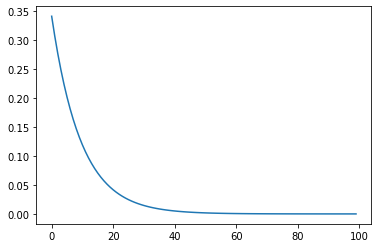

Press Enter to Reset...
Joint State Reset Done


In [7]:
#Q 3.b

y_target = [-0.2, -0.4, 1.1]
alpha = 0.1
iterr = 100
Part = "|handR"

input("Press Enter to continue...")
Err = ReachTarget(K,y_target,alpha,iterr,Part,False,False)
PlotError(iterr,Err,False)

input("Press Enter to Reset...")
Reset_JointState()

Press Enter to continue...


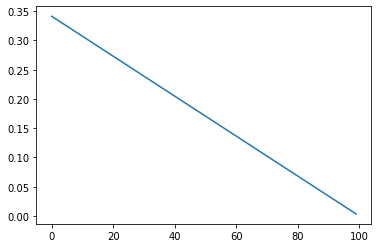

Press Enter to Reset...
Joint State Reset Done


In [8]:
#Q 3.c

y_target = [-0.2, -0.4, 1.1]
alpha = 1.0
iterr = 100
Part = "|handR"
input("Press Enter to continue...")
Err = ReachTarget(K,y_target,alpha,iterr,Part,True,False)
PlotError(iterr,Err,False)
input("Press Enter to Reset...")
Reset_JointState()

In [9]:
def DrawCircle(K,Center,alpha,iterr,Part,Radius):
    n = K.getJointDimension()
    q = K.getJointState()
    w = 1e-4
    W = w * np.identity(n)  # W is equal the ID_n matrix times scalar w
    
    F  = K.feature(lry.FS.position, [Part])  # "handR" is the name of the right hand ("handL" for the left hand)
    
    ReachTarget(K,[Center[0] + Radius,Center[1],Center[2]],1,100,Part,True,False) # Reach a point in the Cirle
    
    #input("Press Enter to continue...")
    y0,j0 = F.eval(K)
    
    StepAngle = 2*math.pi / iterr;
    
    for i in range(iterr):
        # 1st task
        y, J = F.eval(K)
        new_x = Radius * math.cos(StepAngle * (i+1))
        new_y = 0
        new_z = Radius * math.sin(StepAngle * (i+1))
        new_Target = [new_x,new_y,new_z]
        
        # compute joint updates
        y_target = list( map(add, Center, new_Target) )
            
        q += alpha * inv(J.T @ J + W) @ J.T @ (y_target - y)
        # NOTATION: J.T is the transpose of J; @ is matrix multiplication (dot product)
        # sets joint angles AND computes all frames AND updates display
        K.setJointState(q)

        # optional: pause and watch OpenGL
        #input("Press Enter to continue...")

In [17]:
#3.d
from operator import add
Reset_JointState()
input("Press Enter to continue...")
alpha = 1.0
iterr = 2000
Part = "|handR"
Radius  = 0.2
Center = [-0.2, -0.4, 1.1]
DrawCircle(K,Center,alpha,iterr,Part,Radius)

Joint State Reset Done
Press Enter to continue...


In [18]:
Reset_JointState()

Joint State Reset Done
